# 星巴克毕业项目

### 简介

这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

清洗数据非常重要也非常需要技巧。

你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额

**注意：**如果你正在使用 Workspace，在读取文件前，你需要打开终端/命令行，运行命令 `conda update pandas` 。因为 Workspace 中的 pandas 版本不能正确读入 transcript.json 文件的内容，所以需要更新到 pandas 的最新版本。你可以单击 notebook 左上角橘黄色的 jupyter 图标来打开终端/命令行。  

下面两张图展示了如何打开终端/命令行以及如何安装更新。首先打开终端/命令行：
<img src="pic1.png"/>

然后运行上面的命令：
<img src="pic2.png"/>

最后回到这个 notebook（还是点击橘黄色的 jupyter 图标），再次运行下面的单元格就不会报错了。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
from clean_data import clean_portfolio,clean_profile,draw_hist_pics
from clean_data import sep_df,clean_response,find_cid_groups, clean_cid_stats
from clean_data import add_feature_cols

import statsmodels.api as sm
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## 问题
1. 影响活动响应情况的关键活动要素有哪些？ -- 目的：找到需要关注的主要活动特征，聚焦分析焦点
2. 哪些用户没有营销活动也会消费？  -- 目的：减少不必要的营销活动，降低营销成本
3. 对于每个的活动要素，主要的用户群体是？ -- 目的：发现不通过用户对不同活动的偏好，更有针对性的推送活动，进而提高活动响应率

## 方法
#### 1. 清洗数据，将用户的offer响应挂到每个交易上
- 折扣和bogo类offer，连接offer完成记录和交易记录，保留收到且看过的，满足最低消费金额，在发送时间有效期内，距离发送时间最近的一次交易
- informational类offer，连接交易记录，保留收到且看过的，在发送时间有效期内，距离发送时间最近的一次交易
- 结合三类offer接收和交易记录，如果一个交易有多类offer的，按回报最高的offer作为该交易使用的offer

#### 2. 以每类活动的特征为自变量，活动响应率为因变量，创建回归方程
- 变量通过相关系数初步筛选
- 得到解释力高，系数显著，且删除任一一条记录，系数仍稳定的回归关系
- 识别关键活动要素

#### 3. 通过构建活动要素偏好特征，查看匹配的用户群体
- offer交易次数占比，衡量用户总体的活动偏好水平
- offer交易金额占比，衡量用户总体的活动偏好水平
- bogo offer交易次数占总offer次数比例，衡量用户bogo类活动偏好水平
- discount offer交易次数占总offer次数比例，衡量用户discount类活动偏好水平
- informational offer交易次数占总offer次数比例，衡量用户informational活动偏好水平
- social offer交易次数占总offer次数比例，衡量用户social渠道偏好水平
- 对于非信息offer类，使用最高offer difficulty与最高offer交易金额的比例，衡量用户对最高difficulty的敏感度，当大于0时，该比例越高，说明对difficulty越敏感
- 用户群属性特征主要看年龄、收入水平、性别、注册会员时间

## 数据准备和初步探索

#### 1. 营销活动信息

In [4]:
portfolio = clean_portfolio(portfolio)
portfolio = portfolio.rename(columns={'index':'offeridx'})

In [5]:
portfolio1 = portfolio.join(pd.get_dummies(portfolio['offer_type']).drop('informational',axis=1))
portfolio1 

,offeridx,reward,difficulty,duration_day,offer_type,offerid,duration_hour,email,mobile,web,social,bogo,discount
0,0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,168,1,1,0,1,1,0
1,1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,120,1,1,1,1,1,0
2,2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,96,1,1,1,0,0,0
3,3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,168,1,1,1,0,1,0
4,4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,240,1,0,1,0,0,1
5,5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,168,1,1,1,1,0,1
6,6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,240,1,1,1,1,0,1
7,7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,72,1,1,0,1,0,0
8,8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,120,1,1,1,1,1,0
9,9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,168,1,1,1,0,0,1


- 有三种推送类型，10种条件组合（回报、难度、有效时长），4个买一送一活动，4个打折活动，2个营销信息
- 索引4门槛最高，只通过web和邮件发送； 0和1回报最高，0不通过web发送； 
- 三种推送类型中，bogo和discount有最低消费要求，交易记录中有offer完成状态；但informational没有最低消费要求，交易记录中没有完成状态

#### 2. 星巴克用户信息

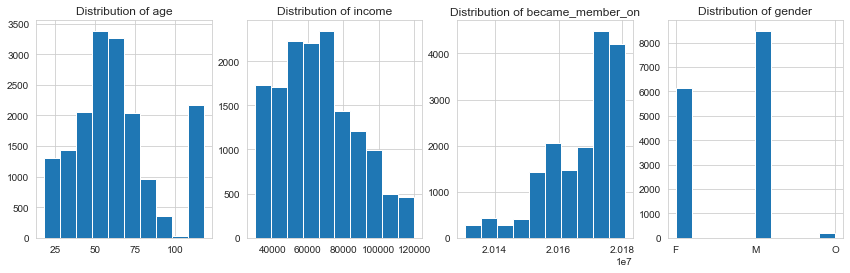

In [6]:
cols = ['age','income','became_member_on','gender']

# 基本的变量分布
plt.figure(figsize=(22,4))
for i,col in enumerate(profile[cols].columns):
    plt.subplot(161+i)
    profile[col].hist()
    plt.title('Distribution of '+ col)

plt.show()

In [7]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [8]:
profile.became_member_on.max(),profile.became_member_on.min()

(20180726, 20130729)

In [9]:
profile.query("age>=100").sample(10)

,gender,age,id,became_member_on,income
7042,None,118,e97c1954386a4970af65db780360ec50,20180219,NaN
15107,None,118,97a94283e9a84bb2907d7fb3402c5e26,20150917,NaN
6185,None,118,fabefc60ee364eabb634047a2d441e50,20180628,NaN
12641,None,118,75d9de6a8e66420ba4215e53003e0f42,20180423,NaN
11013,None,118,c42883ead2d0413298e204d4643cb64b,20150910,NaN
3325,None,118,3083b4b83d3c436d90fb41297da0e9d3,20170407,NaN
7723,None,118,a67ec25ff5d347848636367c636362ed,20180314,NaN
3217,None,118,e2a64c06c0c34d578aea58f0123d59f1,20170623,NaN
11059,None,118,8b298b81838242ea9a92b16d8bc5d068,20161211,NaN
11526,None,118,d7af537a9c1c47d8a89913699c4b4343,20170718,NaN


In [10]:
# 清洗用户数据
profile1 = clean_profile(profile)
profile1.head()

,gender,age,cid,became_member_on,income,became_member_month,became_member_year,age_range,income_range
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112.0,7,"(2016, 2018]","(35, 55]","(90, 120]"
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100.0,5,"(2016, 2018]","(55, 75]","(90, 120]"
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70.0,4,"(2016, 2018]","(55, 75]","(60, 75]"
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53.0,2,"(2016, 2018]","(55, 75]","(45, 60]"
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51.0,11,"(2016, 2018]","(55, 75]","(45, 60]"


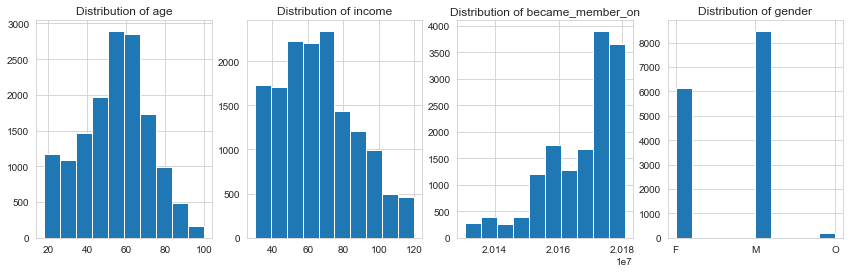

In [11]:
cols = ['age','income','became_member_on','gender']

# 基本的变量分布
plt.figure(figsize=(22,4))
for i,col in enumerate(profile1[cols].columns):
    plt.subplot(161+i)
    profile1[col].hist()
    plt.title('Distribution of '+ col)

plt.show()

In [12]:
profile1['gender'].value_counts()

M    8484
F    6124
O     212
Name: gender, dtype: int64

In [13]:
profile1['age_range'].value_counts()/profile.shape[0]

(55, 75]     0.334529
(35, 55]     0.300824
(17, 35]     0.139647
(75, 100]    0.096765
Name: age_range, dtype: float64

In [14]:
profile1['income_range'].value_counts()/profile.shape[0]

(60, 75]     0.222176
(45, 60]     0.213294
(29, 45]     0.180235
(90, 120]    0.129000
(75, 90]     0.127059
Name: income_range, dtype: float64

In [15]:
profile1['became_member_year'].value_counts()/profile.shape[0]

(2016, 2018]    0.544941
(2014, 2016]    0.271765
(2012, 2014]    0.055059
Name: became_member_year, dtype: float64

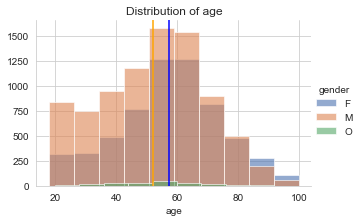

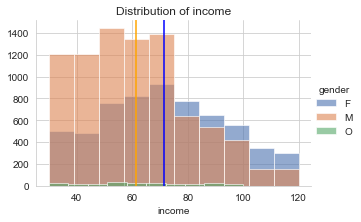

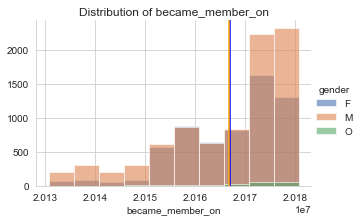

In [16]:
draw_hist_pics(profile1, cols, hue='gender')

- 原始用户表中有2000多个年龄异常，这部分用户没有收入和性别信息，剔除这部分后，剩余14820个用户id
- 其中，男性和女性分别占比41%和57%，其余性别为O
- 中老年年龄组(35到75岁)的人占比合计约73%, 超高龄(75, 100)占10%，年轻人(35以下)占14%
- 中等收入，即收入水平在45k-75k的人约占一半， 较低收入水平29k-45k约占20%，较高收入水平75k-120k约占30%
- 2015年-2018年的会员合计占比超过80%
- 男性用户年龄和收入水平比女性更低，特别的是男性会员在17年以后增加得比女性多

#### 3. 交易信息

In [17]:
transcript = transcript.rename(columns={'person':'cid', 'offer':'offerid'})

print(transcript.shape, transcript.event.unique())
transcript.sample(5)

(306534, 4) ['offer received' 'offer viewed' 'transaction' 'offer completed']


,cid,event,value,time
185652,e50f7ca791084b79ad72c0fda0ae91e3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,450
118382,3597f1f307134a28894afe960cae8f0b,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336
191070,0ea6ca65121843f4832440ccd6c28973,transaction,{'amount': 1.78},462
199551,26ffde4f42334fe7b162f2186070fe53,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},492
227042,685a085e74d0496a82def0e0962289ab,transaction,{'amount': 1.06},522


In [18]:
# 清洗数据，拆分接收offer、浏览offer、完成offer、交易四个表
# 根据业务限制条件判断每个交易有对应到哪一个营销offer
received, viewed, completed, transaction = sep_df(transcript,  portfolio)
received_info = received.query("offer_type=='informational'")
received_other = received.query("offer_type !='informational'")

received_view, received_view_comp, transaction_response, response, received_response \
                                                = clean_response(received,viewed,completed,transaction\
                                                                ,received_info,received_other)

In [19]:
# offer接收+offer响应表，保留有用户信息的
received_response_cid = pd.merge(received_response, profile1, how='left', on='cid')
received_response_cid = received_response_cid[~received_response_cid.became_member_year.isnull()]

# 交易+offer响应表，保留有用户信息的
transaction_response_cid = pd.merge(transaction_response, profile1, how='left', on='cid')
transaction_response_cid = transaction_response_cid[~transaction_response_cid.became_member_year.isnull()]

In [20]:
received.shape

(74396, 13)

In [21]:
print(received_response_cid.shape)
received_response_cid.head()

(64997, 25)


,cid,received_time,received_offer,offeridx,reward,difficulty,duration_day,offer_type,duration_hour,email,mobile,web,social,viewed_time,transaction_time,amount,is_response,gender,age,became_member_on,income,became_member_month,became_member_year,age_range,income_range
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,5,5,7,bogo,168,1,1,1,0,6.0,132.0,19.89,1,F,75.0,20170509.0,100.0,5.0,"(2016, 2018]","(55, 75]","(90, 120]"
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,9,2,10,7,discount,168,1,1,1,0,NaN,NaN,NaN,0,M,68.0,20180426.0,70.0,4.0,"(2016, 2018]","(55, 75]","(60, 75]"
4,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d,8,5,5,5,bogo,120,1,1,1,1,0.0,60.0,9.54,1,M,65.0,20180209.0,53.0,2.0,"(2016, 2018]","(55, 75]","(45, 60]"
6,2eeac8d8feae4a8cad5a6af0499a211d,0,3f207df678b143eea3cee63160fa8bed,2,0,0,4,informational,96,1,1,1,0,NaN,NaN,NaN,0,M,58.0,20171111.0,51.0,11.0,"(2016, 2018]","(55, 75]","(45, 60]"
7,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,4,5,20,10,discount,240,1,0,1,0,NaN,NaN,NaN,0,F,61.0,20170911.0,57.0,9.0,"(2016, 2018]","(55, 75]","(45, 60]"


In [22]:
print(transaction_response.shape)
transaction_response.head()

(138933, 17)


,cid,transaction_time,amount,received_time,received_offer,reward,viewed_time,offeridx,difficulty,duration_day,offer_type,duration_hour,email,mobile,web,social,is_offer
0,02c083884c7d45b39cc68e1314fec56c,0,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,34.56,0.0,2906b810c7d4411798c6938adc9daaa5,2.0,0.0,9.0,10.0,7.0,discount,168.0,1.0,1.0,1.0,0.0,1
2,54890f68699049c2a04d415abc25e717,0,13.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,b2f1cd155b864803ad8334cdf13c4bd2,0,19.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,fe97aa22dd3e48c8b143116a8403dd52,0,18.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [23]:
# 总响应率: 响应次数/接收次数
received_response_cid.is_response.mean()

0.36860162776743544

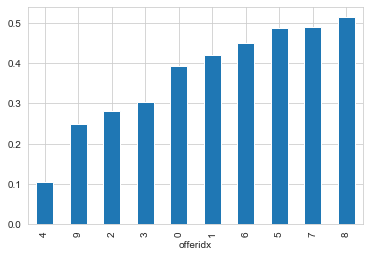

In [24]:
# 每类offer的响应率 图
received_response_cid.groupby('offeridx').is_response.mean().sort_values().plot(kind='bar');

In [25]:
# 每类offer的响应率、offer接收次数，offer接收人数，offer响应人数表
received_response_stats = received_response_cid.groupby('offeridx').agg({'is_response':['mean','count'],
                                               'cid':[pd.Series.nunique]})
received_response_stats = received_response_stats.join(received_response_cid.query("is_response==1")\
                                                       .groupby('offeridx').cid.nunique())

received_response_stats.columns = ['is_response_rate','offer_count', 'offer_unique_cid','response_unique_cid']
received_response_stats

,is_response_rate,offer_count,offer_unique_cid,response_unique_cid
offeridx,,,,
0,0.393147,6537,5446,2313
1,0.419295,6468,5399,2415
2,0.282020,6496,5392,1673
3,0.303165,6541,5420,1832
4,0.104749,6549,5449,654
5,0.485745,6524,5399,2806
6,0.448807,6495,5408,2591
7,0.490250,6513,5407,2872
8,0.514014,6422,5315,2958


- 总响应率在37%，最高的8类响应率51%
- 10种推送，分发量比较均匀,发送次数都在6500次左右，发送人数在5400左右


- 第4类推送响应率最低，响应人数明显最少，结合offer信息看，可能是因为门槛最高，也可能是因为没有在手机和社交渠道发送
- 2、3、9响应人数也少，可能也是因为没有在社交渠道发送

- 以上说明offer_type, difficulty,social是比较关键的活动特征

In [26]:
portfolio1

,offeridx,reward,difficulty,duration_day,offer_type,offerid,duration_hour,email,mobile,web,social,bogo,discount
0,0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,168,1,1,0,1,1,0
1,1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,120,1,1,1,1,1,0
2,2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,96,1,1,1,0,0,0
3,3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,168,1,1,1,0,1,0
4,4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,240,1,0,1,0,0,1
5,5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,168,1,1,1,1,0,1
6,6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,240,1,1,1,1,0,1
7,7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,72,1,1,0,1,0,0
8,8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,120,1,1,1,1,1,0
9,9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,168,1,1,1,0,0,1


In [27]:
# 以informational为基础，创建针对响应率的回归方程
# 多次调整特征，使去掉任何一个特征参数将不稳定，去掉任何一个记录方程参数仍较稳定。如下
i = 4

y = received_response_cid.groupby('offeridx').is_response.mean().reset_index()['is_response'].drop(i)*100
portfolio1['intercept'] = 1
portfolio1['diff_reward'] = portfolio1['difficulty']*portfolio1['reward']
X = portfolio1[['difficulty','social','bogo','discount','intercept']].drop(i)

In [28]:
# 查看自变量的相关性，保留最有用的变量
X.corr()[np.abs(X.corr())>=0.65] # 折扣和bogo方式存在负相关，但为了便于解释，均放入回归

,difficulty,social,bogo,discount,intercept
difficulty,1.0,NaN,NaN,NaN,NaN
social,NaN,1.0,NaN,NaN,NaN
bogo,NaN,NaN,1.0,NaN,NaN
discount,NaN,NaN,NaN,1.0,NaN
intercept,NaN,NaN,NaN,NaN,NaN


In [29]:
rst = sm.OLS(y,X).fit()
rst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_response   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           0.000270
Time:                        20:54:51   Log-Likelihood:                -11.896
No. Observations:                   9   AIC:                             33.79
Df Residuals:                       4   BIC:                             34.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
difficulty    -1.8934      0.249     -7.597      0.002      -2.585      -1.201
social        19.9962      1.002     19.951      0.000      17.213      22.779
bogo          11.3284      2.183      5.190      0.007       5.269      17.388
discount      14.4967      2.541      5.705      0.005       7.442      21.552
intercept     28.6154      1.085     26.372      0.000      25.603      31.628
==============================================================================
Omnibus:                        1.593   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.078
Skew:                          -0.716   Prob(JB):                        0.583
Kurtosis:                       2.091   Cond. No.                         55.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

结论和解释：
- 系数全部显著，R2接近100%，比较具有解释力
- 信息类推送，预计综合响应率在28%左右，在其他条件不变的情况下，变成bogo或discount类型的推送，响应率预计会增加百分点10个左右
- 信息类推送是无门槛的，但bogo或discount类型都有门槛，其他条件不变的情况下，difficulty提高一个单位，预计响应率会比信息类低1-2个百分点
- 社交渠道非常重要，其他条件不变的情况下，推送增加社交渠道，预计响应率可以提升接近20个百分点

----
- 应该如何将社交渠道、推送类型和折扣门槛这些活动要素 与特定用户群体做匹配呢？下面结合用户特征做分析

#### 4. 用户交易行为信息

In [30]:
# 以用户为主键，清洗和整合用户收到offer的数据以及交易数据
cid_stats = clean_cid_stats(received_response_cid, transaction_response_cid)

In [31]:
cid_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cid                        14482 non-null  object 
 1   amount_tr_amin             14482 non-null  float64
 2   amount_tr_amax             14482 non-null  float64
 3   amount_tr_mean             14482 non-null  float64
 4   amount_tr_sum              14482 non-null  float64
 5   transaction_time_tr_count  14482 non-null  int64  
 6   is_offer_tr_sum            14482 non-null  int64  
 7   bogo_offer_sum             11057 non-null  float64
 8   discount_offer_sum         11057 non-null  float64
 9   informational_offer_sum    11057 non-null  float64
 10  social_offer_sum           11057 non-null  float64
 11  difficulty_offer_amin      11057 non-null  float64
 12  difficulty_offer_amax      11057 non-null  float64
 13  difficulty_offer_mean      11057 non-null  flo

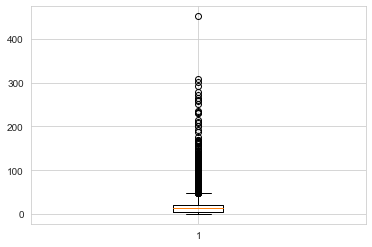

In [32]:
# 单均金额分布
plt.boxplot(cid_stats.amount_tr_mean); #.hist()

In [33]:
# 有人单均金额高于100了,而饮料的均价不应该这么贵，这看起来不像是个人用户
# 按照异常值去除,划定99分位数以上的为异常值
np.percentile(cid_stats.amount_tr_mean,99)

78.52698750000009

In [34]:
cid_stats = cid_stats.query("amount_tr_mean<78")

In [35]:
cid_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14334 entries, 0 to 14481
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cid                        14334 non-null  object 
 1   amount_tr_amin             14334 non-null  float64
 2   amount_tr_amax             14334 non-null  float64
 3   amount_tr_mean             14334 non-null  float64
 4   amount_tr_sum              14334 non-null  float64
 5   transaction_time_tr_count  14334 non-null  int64  
 6   is_offer_tr_sum            14334 non-null  int64  
 7   bogo_offer_sum             10920 non-null  float64
 8   discount_offer_sum         10920 non-null  float64
 9   informational_offer_sum    10920 non-null  float64
 10  social_offer_sum           10920 non-null  float64
 11  difficulty_offer_amin      10920 non-null  float64
 12  difficulty_offer_amax      10920 non-null  float64
 13  difficulty_offer_mean      10920 non-null  flo

In [36]:
cid_stats[['cid','is_offer_tr_sum','received_time_rece_count','amount_offer_sum']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14334 entries, 0 to 14481
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cid                       14334 non-null  object 
 1   is_offer_tr_sum           14334 non-null  int64  
 2   received_time_rece_count  14334 non-null  int64  
 3   amount_offer_sum          10920 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 559.9+ KB


- 可以看出，有3400+个用户有交易记录，收到过推送但一次也没有响应过，这类人群需要减少发推送的频次，减少干扰 
- 其余发生过活动交易的用户，可查看偏好各类活动要素的用户群体特征

#### 分类整理需要探索的数据

In [37]:
# 1.不需要offer仍交易的用户
cid_noneed_offer = cid_stats[cid_stats.is_offer_tr_sum==0].iloc[:,:7]
cid_noneed_offer = pd.merge(cid_noneed_offer,profile1,how='left', on='cid')

In [38]:
# 2.收到offer，且有过offer交易的用户
cid_with_offer = cid_stats[cid_stats.is_offer_tr_sum>0]
# 增加offer交易相关的特征变量
cid_with_offer = add_feature_cols(cid_with_offer)

cid_with_offer = pd.merge(cid_with_offer,profile1,how='left', on='cid')

In [39]:
cols1 = ['amount_tr_mean','transaction_time_tr_count','age','income','became_member_on','gender']

metrics = ['offer_count_ratio','offer_amount_ratio','bogo_offer_ratio','discount_offer_ratio'\
          ,'informational_offer_ratio','social_offer_ratio','difficulty_offer_ratio']

all_feature_cols = cols1+metrics+['became_member_year','age_range','income_range']
cid_with_offer_feature = cid_with_offer[all_feature_cols]

In [40]:
cid_with_offer_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10920 entries, 0 to 10919
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   amount_tr_mean             10920 non-null  float64 
 1   transaction_time_tr_count  10920 non-null  int64   
 2   age                        10920 non-null  int64   
 3   income                     10920 non-null  float64 
 4   became_member_on           10920 non-null  int64   
 5   gender                     10920 non-null  object  
 6   offer_count_ratio          10920 non-null  float64 
 7   offer_amount_ratio         10920 non-null  float64 
 8   bogo_offer_ratio           10920 non-null  float64 
 9   discount_offer_ratio       10920 non-null  float64 
 10  informational_offer_ratio  10920 non-null  float64 
 11  social_offer_ratio         10920 non-null  float64 
 12  difficulty_offer_ratio     10920 non-null  float64 
 13  became_member_year         1092

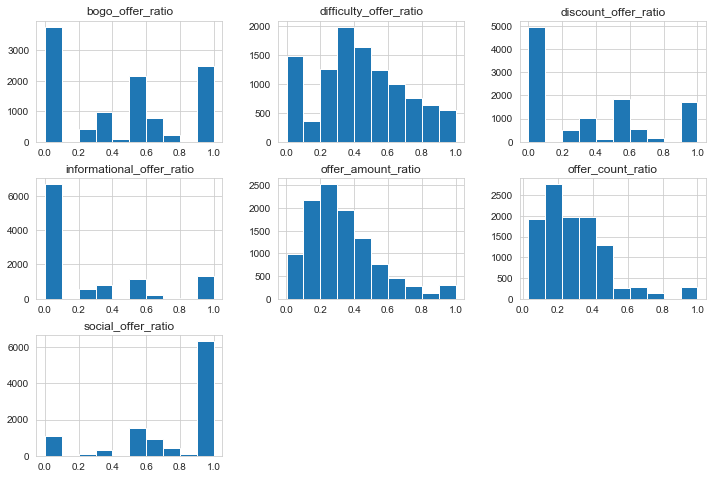

In [41]:
# 查看
cid_with_offer_feature[metrics].hist(figsize=(12,8));

- 可以看到有些用户只参加过某一类活动，后续可以分别对比只偏好某一类活动的用户特征
- 设置了活动门槛的offer，如果设置的门槛金额超过交易金额的60%，接受的人就不多了；而门槛太低(低于20%)可能收获也不大，人们的参与兴趣也不大

In [42]:
cid_with_offer_feature.describe()

,amount_tr_mean,transaction_time_tr_count,age,income,became_member_on,offer_count_ratio,offer_amount_ratio,bogo_offer_ratio,discount_offer_ratio,informational_offer_ratio,social_offer_ratio,difficulty_offer_ratio
count,10920.000000,10920.000000,10920.000000,10920.000000,1.092000e+04,10920.000000,10920.000000,10920.000000,10920.000000,10920.000000,10920.000000,10920.000000
mean,16.203882,9.165568,55.430769,67.831319,2.016557e+07,0.298594,0.332623,0.433573,0.335897,0.230530,0.760351,0.437891
std,9.470430,4.988885,17.049901,21.636468,1.156909e+04,0.194456,0.208921,0.384499,0.366980,0.344688,0.331217,0.262387
min,0.150000,1.000000,18.000000,30.000000,2.013073e+07,0.031250,0.000525,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.272360,5.000000,44.000000,52.000000,2.016041e+07,0.166667,0.182777,0.000000,0.000000,0.000000,0.500000,0.279433
50%,16.518611,8.000000,56.000000,66.000000,2.017041e+07,0.250000,0.288881,0.500000,0.250000,0.000000,1.000000,0.420345
75%,22.439062,12.000000,67.000000,83.000000,2.017112e+07,0.400000,0.433464,0.750000,0.500000,0.400000,1.000000,0.619579
max,77.288750,36.000000,100.000000,120.000000,2.018073e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


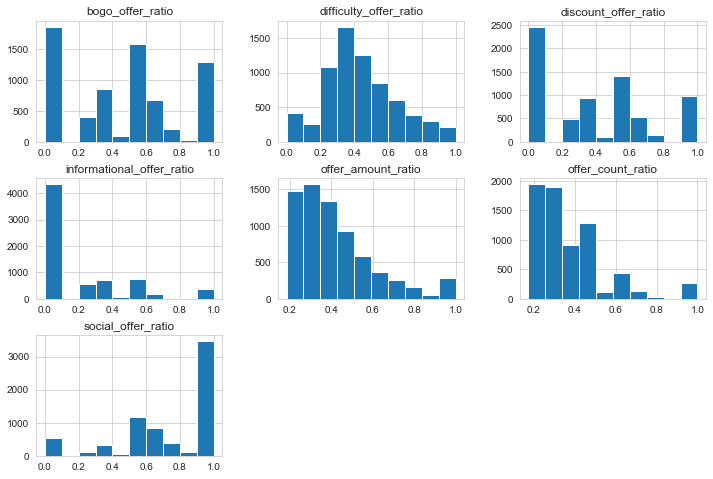

In [43]:
# 3. 定义整体有活动偏好的用户: offer_count_ratio、offer_amount_ratio两个指标均高于25%分位数
cid_offer_like = cid_with_offer_feature.query("offer_count_ratio>=0.17 & offer_amount_ratio>=0.185")
#cid_offer_like = cid_with_offer_feature.query("offer_count_ratio>=0.25 & offer_amount_ratio>=0.28")
# 查看
cid_offer_like[metrics].hist(figsize=(12,8));

In [44]:
cid_offer_like.shape

(7031, 16)

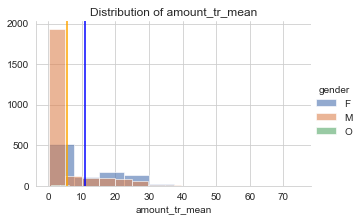

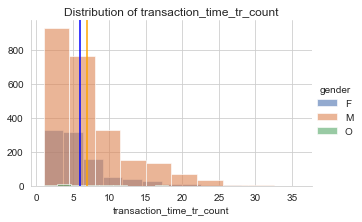

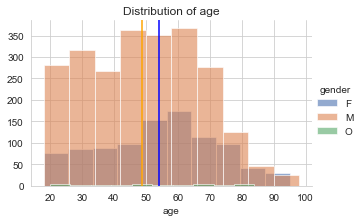

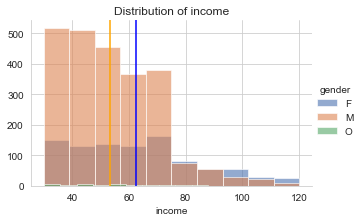

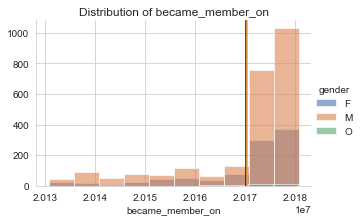

In [45]:
# 无需活动仍交易的用户：次均交易金额、交易次数、年龄、收入、注册时间、性别特征
draw_hist_pics(cid_noneed_offer, cols1, hue='gender')

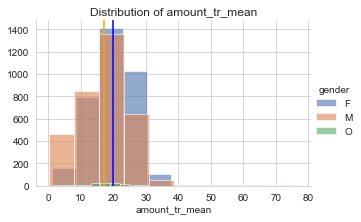

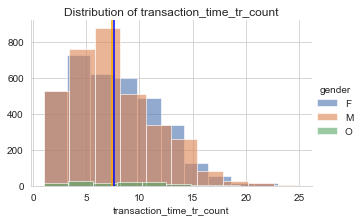

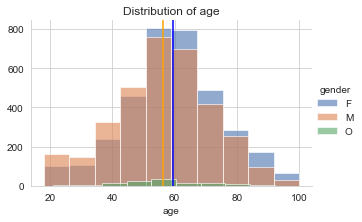

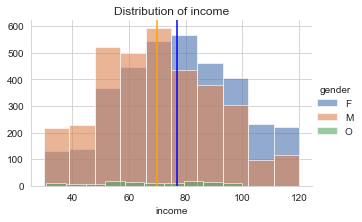

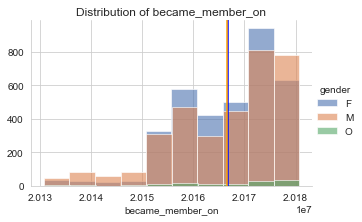

In [46]:
# 有活动偏好的用户：次均交易金额、交易次数、年龄、收入、注册时间、性别特征
draw_hist_pics(cid_offer_like, cols1, hue='gender')

结论：
无需活动仍交易的用户：
- 以男性为主，次均交易金额大部分低于5
- 相比有活动偏好的用户，无活动交易的用户男性中20-40岁中低年龄段的更多，女性中年龄分布较均衡
- 收入水平绝大部分低于75k，低于50k的也较多
- 注册会员时间大部分在17年以后

有活动偏好的用户：
- 男女都有，次均交易金额在20左右，比上述用户高出许多
- 男女整体年龄段无太大差异，主要都在40-80岁内，分布在60岁左右
- 收入水平低于50k的较少，集中在50-100k
- 注册会员时间除了17年以后的，也包括15年和16年的

#### 查看偏好每个活动要素的具体用户群体特征

In [47]:
feature_groups = ['gender','age_range','income_range','became_member_year']

In [62]:
# 偏好bogo的用户群体特征
bogo_like, bogo_like_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='bogo_offer_ratio', condition='==1')
bogo_like_cid_groups

gender
F    670
M    598
O     23
Name: count, dtype: int64 
 age_range
(17, 35]      96
(35, 55]     445
(55, 75]     566
(75, 100]    184
Name: count, dtype: int64 
 income_range
(29, 45]     127
(45, 60]     245
(60, 75]     282
(75, 90]     285
(90, 120]    352
Name: count, dtype: int64 
 became_member_year
(2012, 2014]     38
(2014, 2016]    372
(2016, 2018]    881
Name: count, dtype: int64 



,gender,age_range,income_range,became_member_year,count,tr_amount_mean,tr_count_mean
0,F,"(55, 75]","(90, 120]","(2016, 2018]",88,26.115112,4.272727
1,F,"(55, 75]","(75, 90]","(2016, 2018]",58,21.905502,4.189655
2,M,"(55, 75]","(60, 75]","(2016, 2018]",42,18.162035,4.404762
3,F,"(55, 75]","(90, 120]","(2014, 2016]",40,26.175245,5.375000
4,M,"(35, 55]","(60, 75]","(2016, 2018]",40,15.112272,5.225000
5,M,"(35, 55]","(45, 60]","(2016, 2018]",36,12.623204,5.250000
6,M,"(55, 75]","(45, 60]","(2016, 2018]",36,11.888552,4.972222
7,F,"(35, 55]","(90, 120]","(2016, 2018]",36,26.701288,4.083333
8,M,"(55, 75]","(90, 120]","(2016, 2018]",36,26.158806,4.083333
9,F,"(55, 75]","(60, 75]","(2016, 2018]",35,17.769646,4.028571


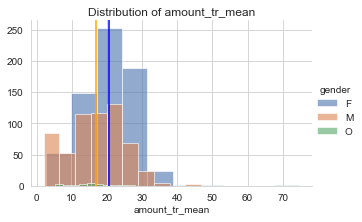

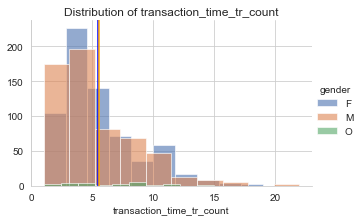

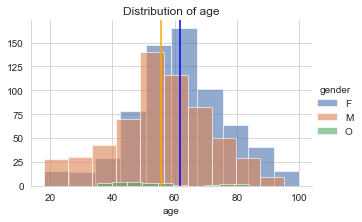

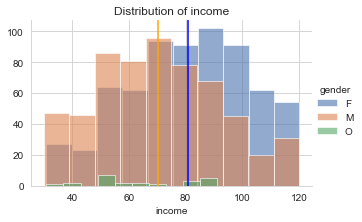

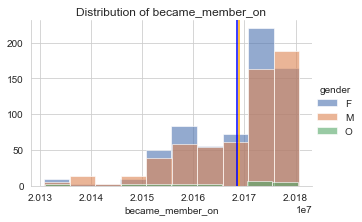

In [72]:
draw_hist_pics(cid_offer_like.query("bogo_offer_ratio==1"), cols1, hue='gender')

结论：
- 男女都有，15-18年的会员都有，但女性的年龄和收入水平有差异
- 偏好bogo类活动的女性平均年龄比男性高5-10岁
- 男女收入分布较分散，从最高到最低都有，但女性收入主女性平均收入水平在80k以上，而男性用户平均在70k左右

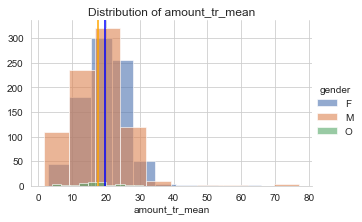

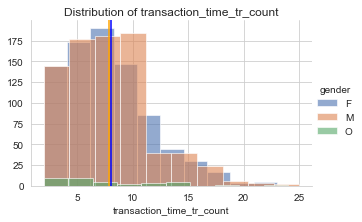

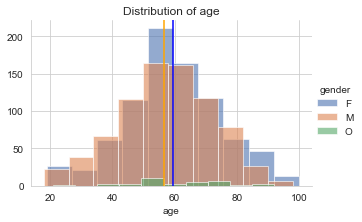

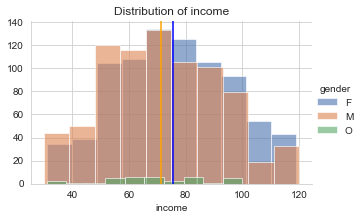

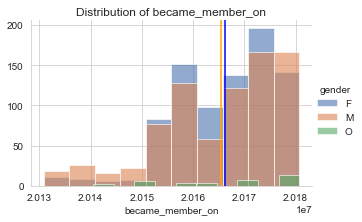

In [80]:
draw_hist_pics(cid_offer_like.query("bogo_offer_ratio<=0.60 & bogo_offer_ratio>=0.4"), cols1, hue='gender')

In [63]:
# 偏好discount的用户群体特征
discount_like, discount_like_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='discount_offer_ratio', condition='==1')

discount_like_cid_groups

gender
F    514
M    445
O     15
Name: count, dtype: int64 
 age_range
(17, 35]      36
(35, 55]     329
(55, 75]     497
(75, 100]    112
Name: count, dtype: int64 
 income_range
(29, 45]      44
(45, 60]     153
(60, 75]     234
(75, 90]     281
(90, 120]    262
Name: count, dtype: int64 
 became_member_year
(2012, 2014]     34
(2014, 2016]    259
(2016, 2018]    681
Name: count, dtype: int64 



,gender,age_range,income_range,became_member_year,count,tr_amount_mean,tr_count_mean
0,F,"(55, 75]","(75, 90]","(2016, 2018]",71,22.166649,4.056338
1,F,"(55, 75]","(90, 120]","(2016, 2018]",64,27.149171,3.609375
2,M,"(35, 55]","(75, 90]","(2016, 2018]",41,22.574895,3.731707
3,M,"(55, 75]","(90, 120]","(2016, 2018]",40,25.823885,4.050000
4,F,"(55, 75]","(90, 120]","(2014, 2016]",36,25.825632,6.111111
5,F,"(35, 55]","(75, 90]","(2016, 2018]",36,21.885606,4.055556
6,M,"(55, 75]","(60, 75]","(2016, 2018]",34,17.028689,4.794118
7,M,"(55, 75]","(75, 90]","(2016, 2018]",33,21.526382,3.666667
8,M,"(35, 55]","(60, 75]","(2016, 2018]",31,16.392711,4.612903
9,F,"(35, 55]","(60, 75]","(2016, 2018]",30,16.397125,4.600000


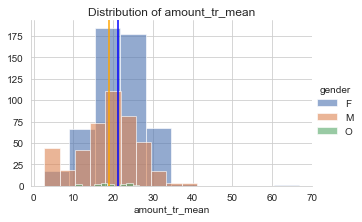

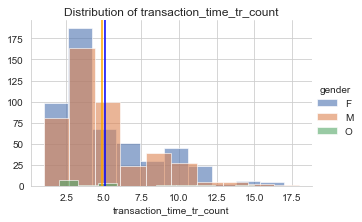

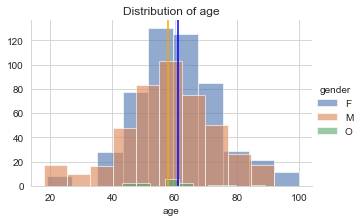

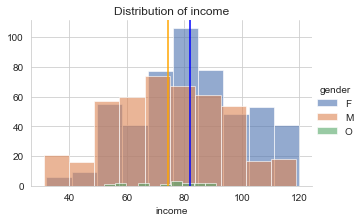

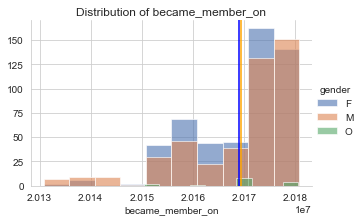

In [71]:
draw_hist_pics(cid_offer_like.query("discount_offer_ratio==1"), cols1, hue='gender')

- 和bogo类似，男女都有，15-18年的会员都有；
- 折扣类用户，男女的年龄分布差别不大，绝大部分都在35-75之间
- 对比bogo类，折扣类用户收入分布更为集中，男性集中在50k-100k，女性集中在50k-120k

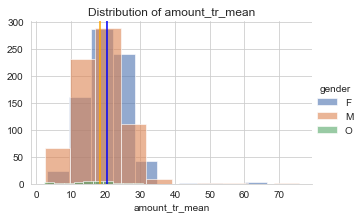

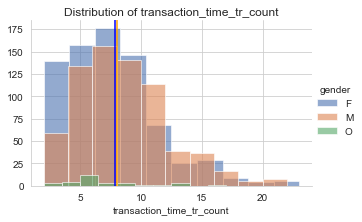

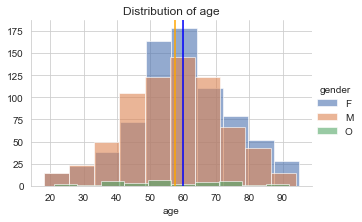

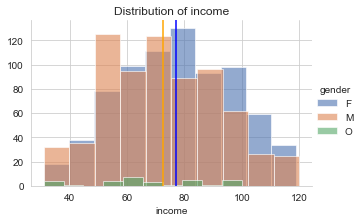

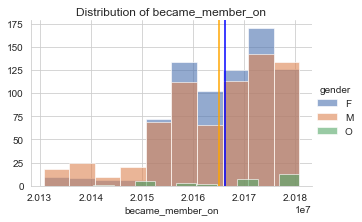

In [81]:
draw_hist_pics(cid_offer_like.query("discount_offer_ratio<=0.60 & discount_offer_ratio>=0.4"), cols1, hue='gender')

In [64]:
# 偏好informational的用户群体特征
informational_like, informational_like_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='informational_offer_ratio', condition='==1')

informational_like_cid_groups

gender
F    118
M    233
O      4
Name: count, dtype: int64 
 age_range
(17, 35]      59
(35, 55]     115
(55, 75]     139
(75, 100]     42
Name: count, dtype: int64 
 income_range
(29, 45]      88
(45, 60]     105
(60, 75]      93
(75, 90]      32
(90, 120]     37
Name: count, dtype: int64 
 became_member_year
(2012, 2014]     16
(2014, 2016]     61
(2016, 2018]    278
Name: count, dtype: int64 



,gender,age_range,income_range,became_member_year,count,tr_amount_mean,tr_count_mean
0,M,"(55, 75]","(45, 60]","(2016, 2018]",24,4.093181,3.583333
1,M,"(17, 35]","(29, 45]","(2016, 2018]",20,2.987077,4.750000
2,M,"(35, 55]","(45, 60]","(2016, 2018]",20,6.429642,4.500000
3,M,"(35, 55]","(60, 75]","(2016, 2018]",20,7.474600,4.050000
4,M,"(35, 55]","(29, 45]","(2016, 2018]",18,3.285485,4.555556
5,M,"(55, 75]","(29, 45]","(2016, 2018]",17,3.060559,3.588235
6,M,"(55, 75]","(60, 75]","(2016, 2018]",16,8.279302,4.187500
7,F,"(55, 75]","(90, 120]","(2016, 2018]",13,23.421103,2.846154
8,F,"(55, 75]","(60, 75]","(2016, 2018]",11,11.261418,4.181818
9,M,"(17, 35]","(60, 75]","(2016, 2018]",10,6.075592,5.900000


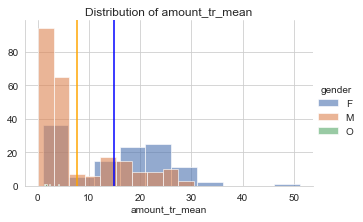

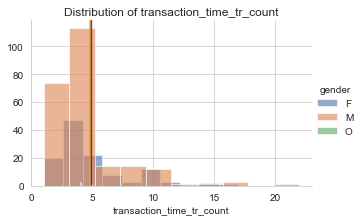

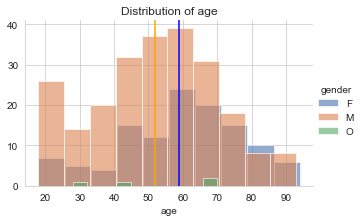

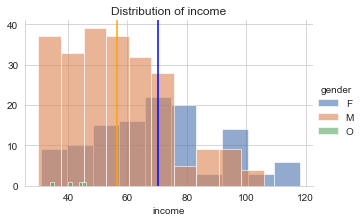

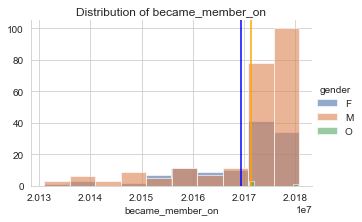

In [83]:
draw_hist_pics(cid_offer_like.query("informational_offer_ratio==1"), cols1, hue='gender')

结论：
- 信息类偏好的用户有自己独特的特征，以男性为主，绝大部分是17年以后注册的会员，收入水平低于75，年龄集中在35-75岁，也包括一些17-35岁的，同时单均金额和交易频次也较少
- 少数高收入女性也会响应信息类offer，消费金额高，但消费次数也偏少

In [1853]:
# 偏好social渠道的用户群体特征
social_like, social_like_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='social_offer_ratio', condition='==1')

social_like_cid_groups

gender
F    1777
M    1647
O      52
Name: count, dtype: int64 
 age_range
(17, 35]      330
(35, 55]     1155
(55, 75]     1528
(75, 100]     463
Name: count, dtype: int64 
 income_range
(29, 45]     401
(45, 60]     682
(60, 75]     810
(75, 90]     715
(90, 120]    868
Name: count, dtype: int64 
 became_member_year
(2012, 2015]     417
(2015, 2017]    2240
(2017, 2018]     819
Name: count, dtype: int64 



,gender,age_range,income_range,became_member_year,count,tr_amount_mean,tr_count_mean
0,F,"(55, 75]","(90, 120]","(2015, 2017]",225,26.270206,5.768889
1,F,"(55, 75]","(75, 90]","(2015, 2017]",160,22.416968,6.012500
2,M,"(55, 75]","(90, 120]","(2015, 2017]",114,26.367037,6.543860
3,F,"(55, 75]","(60, 75]","(2015, 2017]",105,18.407776,7.295238
4,F,"(35, 55]","(90, 120]","(2015, 2017]",103,26.013958,6.271845
5,M,"(35, 55]","(60, 75]","(2015, 2017]",93,15.369616,8.118280
6,M,"(35, 55]","(45, 60]","(2015, 2017]",87,12.205483,7.333333
7,M,"(55, 75]","(75, 90]","(2015, 2017]",87,22.487008,6.494253
8,M,"(55, 75]","(60, 75]","(2015, 2017]",85,18.085256,6.305882
9,F,"(35, 55]","(75, 90]","(2015, 2017]",79,22.249807,6.582278


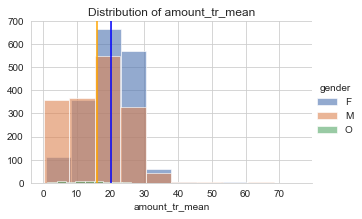

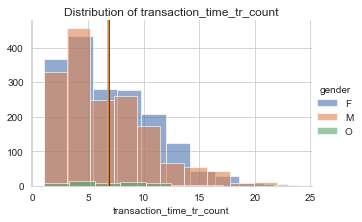

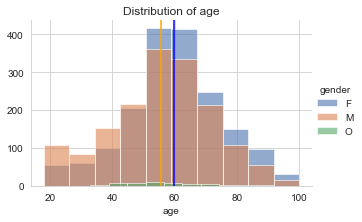

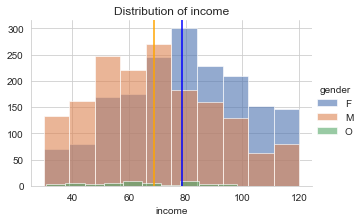

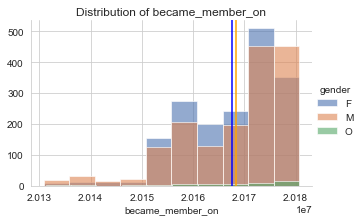

In [77]:
draw_hist_pics(cid_offer_like.query("social_offer_ratio==1"), cols1, hue='gender')

结论：
- 社交渠道活动用户，收入偏高，年龄55-75岁，大部分是15到17年的用户，下单频次相比只选择某类活动的用户下单频次更高

In [82]:
# 活动门槛难度（最低金额限制）较敏感的用户群体特征
cid_offer_like.query("difficulty_offer_ratio>0").difficulty_offer_ratio.describe()

count    6676.000000
mean        0.458790
std         0.195677
min         0.011210
25%         0.315358
50%         0.418148
75%         0.579458
max         0.999001
Name: difficulty_offer_ratio, dtype: float64

In [67]:
# 对活动门槛难度较敏感的用户群体特征
difficulty_sens, difficulty_sens_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='difficulty_offer_ratio', condition='>=0.58')

difficulty_sens_cid_groups

gender
F    717
M    913
O     36
Name: count, dtype: int64 
 age_range
(17, 35]     231
(35, 55]     602
(55, 75]     635
(75, 100]    198
Name: count, dtype: int64 
 income_range
(29, 45]     337
(45, 60]     539
(60, 75]     425
(75, 90]     254
(90, 120]    111
Name: count, dtype: int64 
 became_member_year
(2012, 2014]      65
(2014, 2016]     516
(2016, 2018]    1085
Name: count, dtype: int64 



,gender,age_range,income_range,became_member_year,count,tr_amount_mean,tr_count_mean
0,M,"(35, 55]","(45, 60]","(2016, 2018]",79,10.774138,7.341772
1,M,"(35, 55]","(60, 75]","(2016, 2018]",65,12.429556,6.707692
2,M,"(55, 75]","(45, 60]","(2016, 2018]",64,11.057737,6.312500
3,M,"(35, 55]","(29, 45]","(2016, 2018]",57,6.893257,7.824561
4,F,"(35, 55]","(45, 60]","(2016, 2018]",56,12.678739,7.303571
5,F,"(55, 75]","(45, 60]","(2016, 2018]",54,13.036851,6.203704
6,M,"(17, 35]","(29, 45]","(2016, 2018]",50,7.265877,9.120000
7,M,"(55, 75]","(29, 45]","(2016, 2018]",45,6.853351,7.577778
8,M,"(55, 75]","(60, 75]","(2016, 2018]",44,13.386050,5.886364
9,F,"(55, 75]","(60, 75]","(2016, 2018]",41,14.797039,6.195122


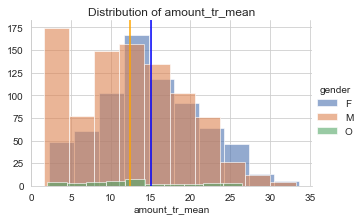

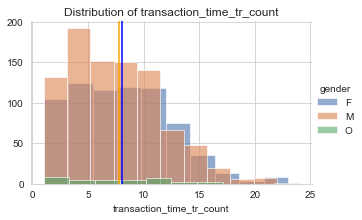

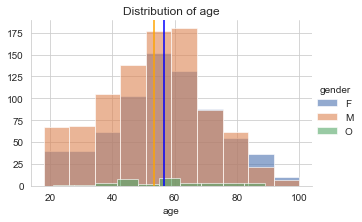

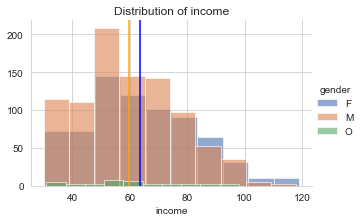

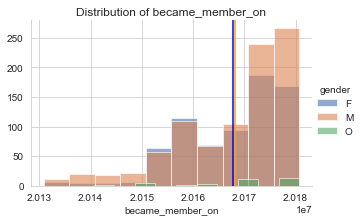

In [84]:
draw_hist_pics(cid_offer_like.query("difficulty_offer_ratio>=0.58"), cols1, hue='gender')

In [68]:
# 对活动门槛难度较不敏感的用户群体特征
difficulty_not_sens, difficulty_not_sens_cid_groups = find_cid_groups(cid_offer_like.query("difficulty_offer_ratio>0"),\
                                                                      feature_groups, \
                                                          metric='difficulty_offer_ratio', condition='<=0.31')

difficulty_not_sens_cid_groups

gender
F    879
M    675
O     15
Name: count, dtype: int64 
 age_range
(17, 35]      45
(35, 55]     519
(55, 75]     789
(75, 100]    216
Name: count, dtype: int64 
 income_range
(29, 45]      27
(45, 60]     116
(60, 75]     277
(75, 90]     396
(90, 120]    753
Name: count, dtype: int64 
 became_member_year
(2012, 2014]     52
(2014, 2016]    623
(2016, 2018]    894
Name: count, dtype: int64 



,gender,age_range,income_range,became_member_year,count,tr_amount_mean,tr_count_mean
0,F,"(55, 75]","(90, 120]","(2016, 2018]",148,27.833431,5.587838
1,F,"(55, 75]","(90, 120]","(2014, 2016]",106,27.125849,7.481132
2,M,"(55, 75]","(90, 120]","(2016, 2018]",86,28.001183,5.883721
3,F,"(55, 75]","(75, 90]","(2016, 2018]",71,25.041464,5.971831
4,F,"(35, 55]","(90, 120]","(2016, 2018]",64,27.377494,5.718750
5,M,"(55, 75]","(90, 120]","(2014, 2016]",62,26.929913,7.709677
6,F,"(35, 55]","(90, 120]","(2014, 2016]",62,27.349886,7.532258
7,F,"(55, 75]","(75, 90]","(2014, 2016]",49,23.280742,7.244898
8,M,"(35, 55]","(90, 120]","(2016, 2018]",48,26.822305,5.291667
9,F,"(75, 100]","(90, 120]","(2016, 2018]",46,27.236148,6.760870


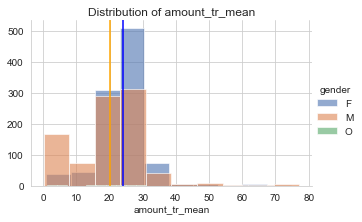

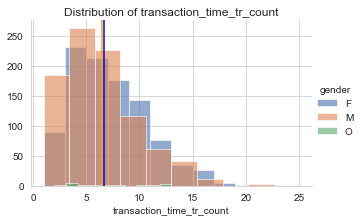

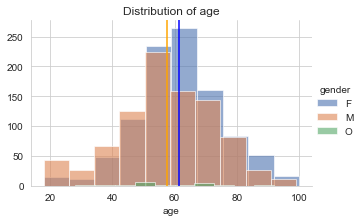

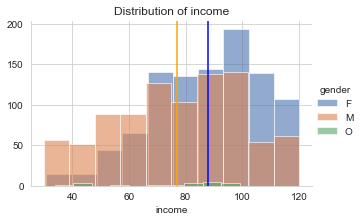

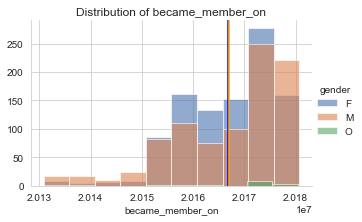

In [85]:
draw_hist_pics(cid_offer_like.query("difficulty_offer_ratio<=0.31"), cols1, hue='gender')

结论：
- 比较而言，男性比女性对difficulty更敏感，年龄较低的、收入较低的对difficulty更敏感
- 对difficulty不敏感的人，次均交易金额高出许多， 但交易次数比difficulty更敏感的人略少一些

## 总结

##### 反思：
- 整个过程包括：
1）理清问题 
2）思考可以回答问题的数据指标
3）根据数据构建表格和所需要的指标 
4）根据指标进行探索性分析或者模型构建 
5）得出结论（回答问题或应用结论）

*   其中，问题和指标定义环节很关键，决定了后续工作的效率和成果
*   由于业务的复杂性，在构建指标整理表格的时候有较大的挑战（判断offer完成应该记在哪一次交易上）
*   在后续回答问题时，需要反复探索数据（分类、对比、可视化），找到特定用户群的特征

##### 主要使用的方法：
- 在找关键活动要素的时候用了回归分析
- 最后回答问题时主要采用了指标对比法——将每类活动偏好的用户群体数据进行对比，找到特定的用户特征

##### 改进和扩展：
*   本分析没有详细分析渠道用户特征，当判断社交渠道的用户群体特征时，还应该同时对比其他渠道的用户特征，这样可以让社交渠道偏好的用户定位更精准
*   本分析只回答了什么用户对什么活动更感兴趣的问题，可能有助于提高营销效率、降低营销成本，但还不够深入，更深入的分析包括比如：考虑发送的成本，就每类活动发送的响应情况，计算ROI
*   该数据也可以通过建立回归模型，预测什么用户将会付更多的钱，来达到提高收益的目的